In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df2 = df.drop(['PassengerId','Name' , 'Ticket' , 'Cabin' , 'Embarked'] , axis='columns')
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [4]:
df2.Sex.unique()

array(['male', 'female'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df2['Sex'] = le_sex.fit_transform(df2['Sex'])

In [6]:
df2.Sex.unique()

array([1, 0])

In [7]:
X_train = df2.drop(['Survived'] , axis='columns')
y_train = df2.Survived

In [8]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [9]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
X_train.Age = X_train.Age.fillna(X_train.Age.mean())

In [11]:
X_train.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [12]:
X_train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [13]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_train , y_train , test_size=0.2)

In [14]:
X_test.shape

(179, 6)

In [15]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train , y_train)


DecisionTreeClassifier()

In [16]:
model.score(X_test , y_test)

0.7541899441340782

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(y_test)

490    0
444    1
37     0
398    0
756    0
      ..
640    0
339    0
657    0
219    0
93     0
Name: Survived, Length: 179, dtype: int64


In [24]:
from sklearn.metrics import classification_report , confusion_matrix

In [25]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[98, 20],
       [24, 37]])

Text(95.72222222222221, 0.5, 'Truth')

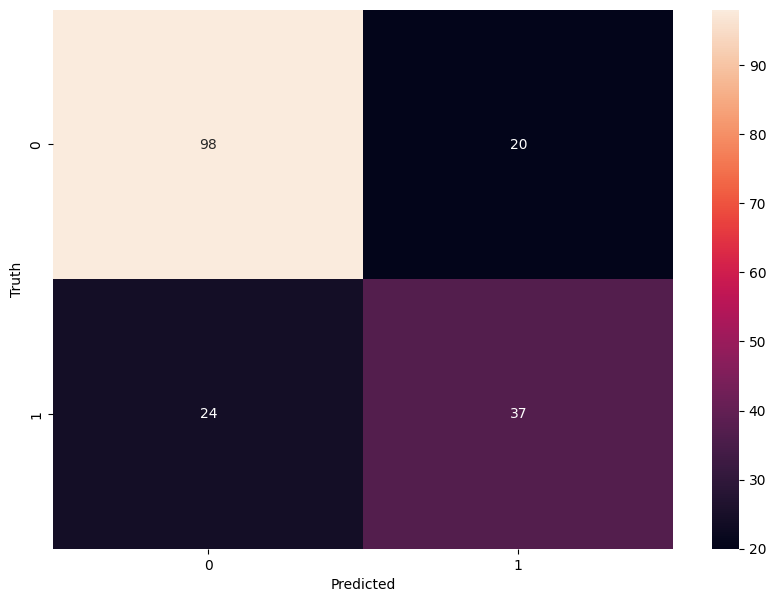

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')